This notebook calcualtes the **Principal Moments of Inertia** and their direction cosines for rigid bodies given their mass and and products of inertia in the orthogonal axes x, y, and z. Authored by _Andrew Zulu_ on October 7, 2017. This was given as a solution to a Moodle quiz in the course *Rigid-Body Dynamics*. Because of duality, the same calculations would apply to the calculation of *Principal Stresses* in *Mechanics of Materials*. 

Start by importing required libraries from *Sympy* and *Matplotlib*

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

The mass *moments of inertia* ($I_{xx},I_{yy},I_{zz}$) and mass *products of inertia* ($I_{xy},I_{xz},I_{yz}$) are calculated and assembled into a 3x3 *Inertia Tensor* square matrix given by:
\begin{bmatrix}
  I_{xx} & -I_{xy} & -I_{xz}\\
  -I_{yx} & I_{yy} & -I_{yz}\\
  -I_{zx} & -I_{zy} & I_{zz}
\end{bmatrix}                                                                                                         

In [2]:
Ixx = 1.648e-3
Iyy = 4.32e-3
Izz = 4.38e-3
Ixy = Iyx = -5.86e-4
Ixz = Izx = 1.069e-3
Iyz = Izy = 0

The orientation for which the products of inertia vanish gives the *principal moments of inertia* termed $I_1$, $I_2$ and $I_3$ and the matrix reduces to:
\begin{bmatrix}
  I_1 & 0 & 0\\
  0 & I_2 & 0\\
  0 & 0 & I_3
\end{bmatrix}

The principal moments are the eigenvalues of the inertia tensor and can be ontained by evaluating its determinant with eigen value $I$ subtracted from each diagonal term as follows:
\begin{vmatrix}
  I_{xx}-I & -I_{xy} & -I_{xz}\\
  -I_{yx} & I_{yy}-I & -I_{yz}\\
  -I_{zx} & -I_{zy} & I_{zz}-I
\end{vmatrix}

which yeild three solutions corresponding to the three principal moments.

In [3]:
X = sp.Symbol('X')
M = sp.Matrix([[Ixx-X,-Ixy,-Ixz],[-Iyx,Iyy-X,-Iyz],[-Izx,-Izy,Izz-X]])
N = sp.det(M)
O = sp.solve(N,X)
I1 = sp.re(O[0])     #1st Principle Moment of Inertia
I2 = sp.re(O[1])     #2nd Principle Moment of Inertia
I3 = sp.re(O[2])     #3rd Principle Moment of Inertia

print("First, second, and third principal moments of inertia; I1, I2, I3 = ", I1, I2, I3)

First, second, and third principal moments of inertia; I1, I2, I3 =  0.00118133050209374 0.00433277397498755 0.00483389552291871


The *principal axes* ($l$, $m$, and $n$) can be obtained by substituting each of $I_1$, $I_2$, and $I_3$ into the determinant
equation and solving together witht the condition that the square of direction cosines must add to 1: $$l^2+m^2+n^2=1$$.

In [4]:
minorA1 = [[Iyy-I1,Iyz], [Izy,Izz-I1]] #2x2 matrices of minors
minorB1 = [[Iyx,Iyz], [Izx,Izz-I1]]    #2x2 matrices of minors
minorC1 = [[Iyy-I1,Iyz], [Iyz,Izz-I1]] #2x2 matrices of minors
minorA2 = [[Iyy-I2,Iyz], [Izy,Izz-I2]] #2x2 matrices of minors
minorB2 = [[Iyx,Iyz], [Izx,Izz-I2]]    #2x2 matrices of minors
minorC2 = [[Iyy-I2,Iyz], [Iyz,Izz-I2]] #2x2 matrices of minors
minorA3 = [[Iyy-I3,Iyz], [Izy,Izz-I3]] #2x2 matrices of minors
minorB3 = [[Iyx,Iyz], [Izx,Izz-I3]]    #2x2 matrices of minors
minorC3 = [[Iyy-I3,Iyz], [Iyz,Izz-I3]] #2x2 matrices of minors
    
detA1 = (Iyy-I1)*(Izz-I1)-(Iyz)**2      #determinants (cofactors) of the minor matrices
detB1 = -((Iyx)*(Izz-I1)-(Iyz)*(Izx))   #determinants (cofactors) of the minor matrices
detC1 = (Iyx)*(Izy)-(Izx)*(Iyy-I1)      #determinants (cofactors) of the minor matrices
detA2 = (Iyy-I2)*(Izz-I2)-(Iyz)**2      #determinants (cofactors) of the minor matrices
detB2 = -((Iyx)*(Izz-I2)-(Iyz)*(Izx))   #determinants (cofactors) of the minor matrices
detC2 = (Iyx)*(Izy)-(Izx)*(Iyy-I2)      #determinants (cofactors) of the minor matrices
detA3 = (Iyy-I3)*(Izz-I3)-(Iyz)**2      #determinants (cofactors) of the minor matrices
detB3 = -((Iyx)*(Izz-I3)-(Iyz)*(Izx))   #determinants (cofactors) of the minor matrices
detC3 = (Iyx)*(Izy)-(Izx)*(Iyy-I3)      #determinants (cofactors) of the minor matrices

l1 = detA1/((detA1**2+detB1**2+detC1**2)**0.5)  #drection cosines
m1 = detB1/((detA1**2+detB1**2+detC1**2)**0.5)  #drection cosines
n1 = detC1/((detA1**2+detB1**2+detC1**2)**0.5)  #drection cosines
l2 = detA2/((detA2**2+detB2**2+detC2**2)**0.5)  #drection cosines
m2 = detB2/((detA2**2+detB2**2+detC2**2)**0.5)  #drection cosines
n2 = detC2/((detA2**2+detB2**2+detC2**2)**0.5)  #drection cosines
l3 = detA3/((detA3**2+detB3**2+detC3**2)**0.5)  #drection cosines
m3 = detB3/((detA3**2+detB3**2+detC3**2)**0.5)  #drection cosines
n3 = detC3/((detA3**2+detB3**2+detC3**2)**0.5)  #drection cosines

print("First direction cosines; l1, m1, n1 =", l1,m1,n1)
print("Second direction cosines; l2, m2, n2 =", l2,m2,n2)
print("Third direction cosines; l3, m3, n3 =", l3,m3,n3)

First direction cosines; l1, m1, n1 = 0.933907233578456 0.174363576426905 -0.312113156219751
Second direction cosines; l2, m2, n2 = -0.0195446288443352 0.896600511112962 0.442408782638085
Third direction cosines; l3, m3, n3 = 0.356980792975159 -0.407068626508610 0.840749574343764


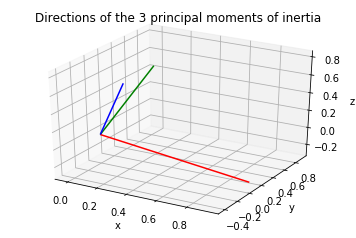

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
#ax = fig.gca(projection='3d')
X1, Y1, Z1 = [0,l1],[0,m1],[0,n1]
X2, Y2, Z2 = [0,l2],[0,m2],[0,n2]
X3, Y3, Z3 = [0,l3],[0,m3],[0,n3]
ax.plot_wireframe(X1,Y1,Z1,color = 'r')
ax.plot_wireframe(X2,Y2,Z2,color = 'g')
ax.plot_wireframe(X3,Y3,Z3,color = 'b')
ax.set_title('Directions of the 3 principal moments of inertia')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()